
## **Dataset**:
O conjunto de dados para este projeto é originário do Repositório de A prendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)




# **Importando os módulos**

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# **Carregando e visualizando os Dados**

In [2]:
df = pd.DataFrame()
csv = pd.read_csv('adult.data', na_values= '?')
df = pd.concat([df,csv])

In [3]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K




# **Descrição dos dados por cabeçalho**

* **age**: Idade

* **workclass**: Classe trabalhadora (Funcionário público, autônomo, empresário...)

* **education**: Escolaridade

* **education-num**: Código do Nível de Escolaridade

* **marital-status**: Estado Civil

* **occupation**: Ocupação

* **relationship**: Relacionamento 

* **race**: Raça

* **sex**: Sexo

* **capital**-gain: Ganho de Capital

* **capital-loss**: Perda de Capital

* **hours-per-week**: Horas de trabalho semanais

* **native-country**: País Nativo

# **Informação sobre as colunas**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [5]:
#Variáveis numéricas
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Variáveis categóricas
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


# **Análise exploratória**

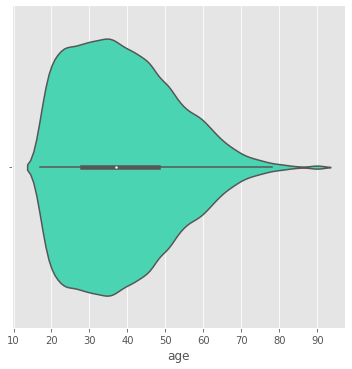

In [7]:
#Distribuição das idades
sns.catplot(x='age',kind='violin',data=df, color= '#34ebbd')

<=50K    24720
>50K      7841
Name: income, dtype: int64

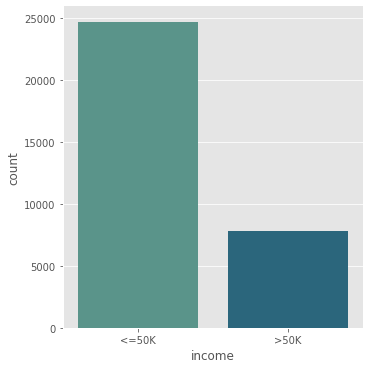

In [8]:
#Distribuição dos salários
sns.catplot(data=df, x='income',kind='count', palette='crest')
df['income'].value_counts()

In [9]:
#Quantidade de pessoas por nível de escolaridade
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

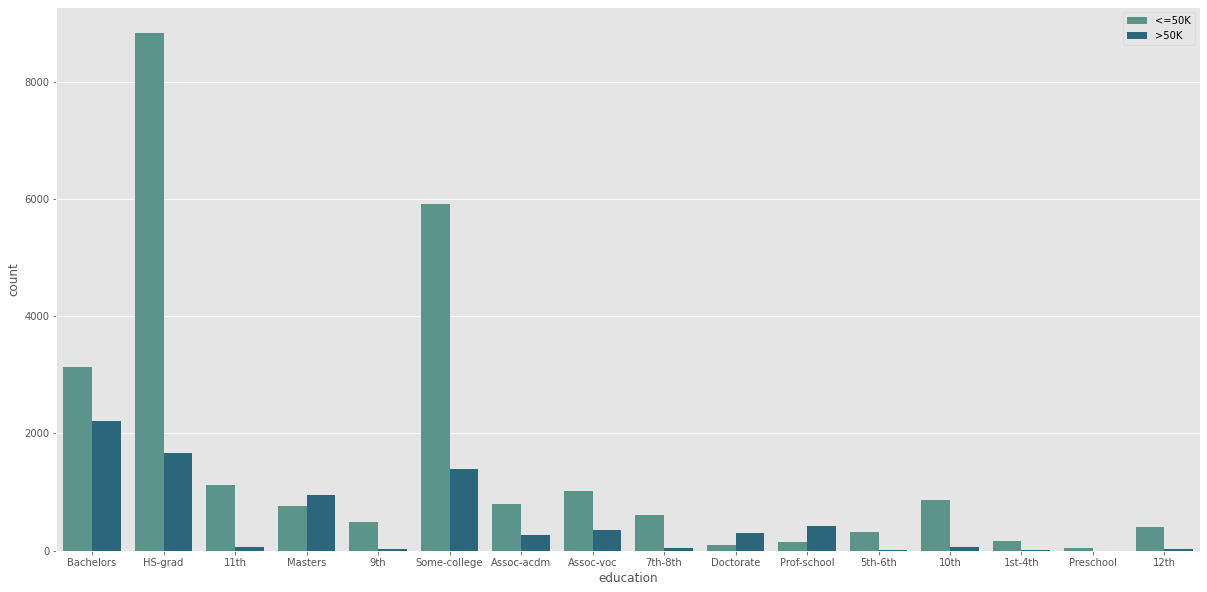

In [10]:
# Distribuição de renda por nível de escolaridade
plt.figure(figsize=(20.5,10))
sns.countplot(data=df, x = 'education',  hue = 'income', palette= 'crest')
plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

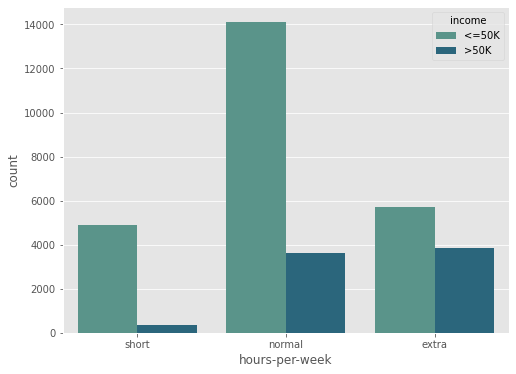

In [11]:
# Para uma melhor visualização, agrupei as horas trabalhadas em 3 categorias:
# 0-30 (jornada curta)
# 30-40 (jornada normal)
# 40-100 (jornada longa)

# Criando novo data frame para armazenar as jornadas divididas em grupos
df_jornadas = pd.DataFrame() 
df_jornadas = pd.concat([df,df_jornadas])
df_jornadas['hours-per-week'] = pd.cut(df_jornadas['hours-per-week'],[0,30,40,100], labels =['short','normal','extra'])

# Distribuição das classes por Horas trabalhadas
plt.figure(figsize=(8,6))
sns.countplot(data=df_jornadas, x = 'hours-per-week',  hue = 'income', palette='crest')
plt.xticks(rotation='horizontal')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

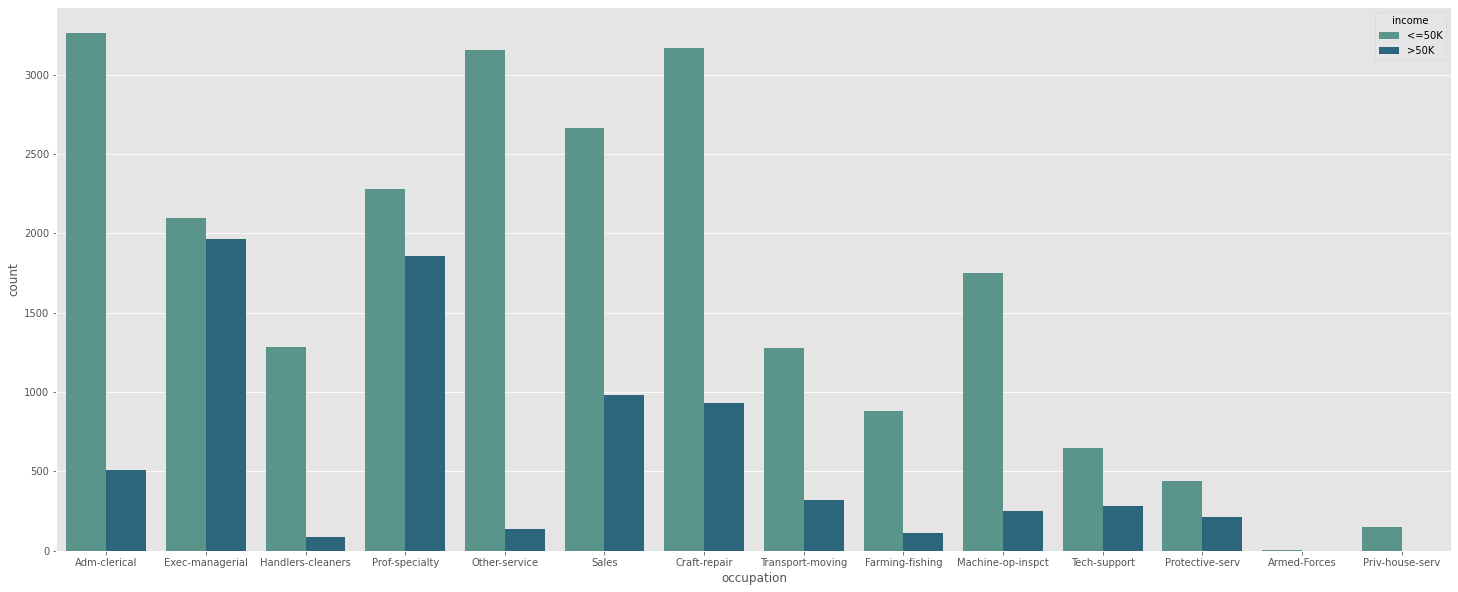

In [12]:
# Distribuiçao de renda de acordo com a ocupação

plt.figure(figsize=(25,10))
sns.countplot(data=df, x = 'occupation', hue = 'income', palette= 'crest')
plt.xticks(rotation='horizontal')

In [13]:
#Quantidade de pessoas por nível de ocupação
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

### Relação de **idade** (coluna age) com a coluna **income** (salário anual)


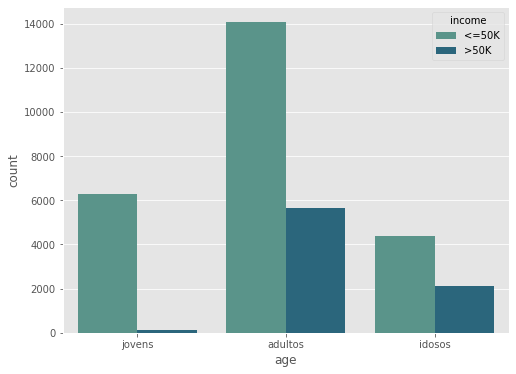

In [14]:
# Para uma melhor visualização, agrupei as idades em 3 categorias:
# 0-25 (jovens)
# 25-50 (adultos)
# 50-100 (idosos)

# Criando novo data frame para armazenar as idades divididas em grupos
df_idades = pd.DataFrame()
df_idades = pd.concat([df_idades,df])
# Dividindo as idades em grupos
df_idades['age'] = pd.cut(df_idades['age'], [0,25,50,100], labels= ['jovens', 'adultos', 'idosos'])

#Plotando o gráfico
plt.figure(figsize=(8,6))
sns.countplot(data=df_idades, x = 'age', hue = 'income', palette= 'crest')

### Relação de **sexo** (coluna sex) com a coluna **income** (salário anual)


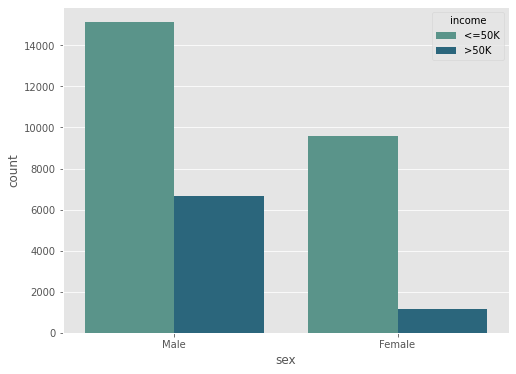

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'sex', hue = 'income', palette= 'crest')

### Relação de **raça** (coluna race) com a coluna **income** (salário anual)


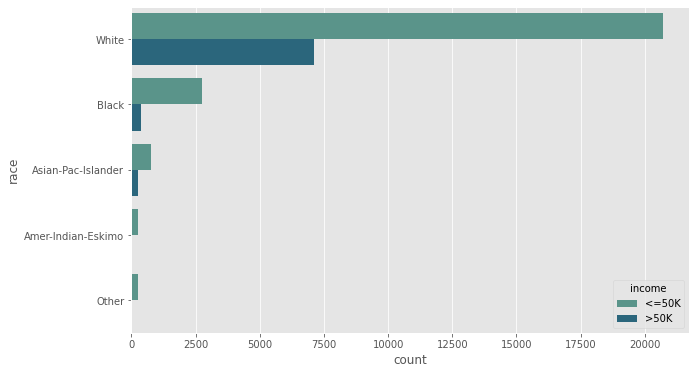

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y = 'race', hue = 'income', palette= 'crest')

# **Análise de dados**






In [17]:
# Verificando a quantidade de valores nulos
total = df.isnull().sum().sort_values(ascending=False)
porcentagem = df.isnull().sum()/df.isnull().count().sort_values(ascending=False) * 100 
dados_faltando = pd.concat([total, porcentagem], axis=1, sort=False, keys=['total', 'porcentagem'])
dados_faltando[dados_faltando['porcentagem']!=0]

,total,porcentagem
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486


In [18]:
# Preenchendo os valores nulos da coluna workclass
nulos_workclass = 'Private'
df['workclass'] = df['workclass'].fillna(nulos_workclass)

In [19]:
# Preenchendo os valores nulos da coluna occupation
nulos_occupation = 'Prof-specialty'
df['occupation'] = df['occupation'].fillna(nulos_occupation)

In [20]:
# Preenchendo os valores nulos da coluna native-country
nulos_native_country = 'United-States'
df['native-country'] = df['native-country'].fillna(nulos_native_country)

In [21]:
# Verificando se ainda existem valores nulos no Dataset.
if df.isnull().sum().any() !=0:
  print('Existem valores nulos')
else: print('Não existem valores nulos')
 

Não existem valores nulos


In [22]:
# Calculado a coluna capital_last (Subtração do capital ganho - capital perdido)
df['capital_last'] = df['capital-gain'] - df['capital-loss']

In [23]:
# Removendo as colunas capital-loss e capital-gain (foram substituidas pela coluna capital_last)
def remover_colunas(colunas):
  for i in colunas:
    df.drop(i, axis=1, inplace=True)

remover_colunas(['capital-gain', 'capital-loss','education'])
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital_last
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0


# **Verificando maiores influenciadores para o modelo**

In [24]:
# Trasnformando as variáveis categóricas em numéricas.
cols = df[df.select_dtypes(['object']).columns]

for c in cols:
    encoding = LabelEncoder()
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
df = pd.get_dummies(df)

In [25]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital_last
0,39,6,13,4,0,1,4,1,40,38,0,2174
1,50,5,13,2,3,0,4,1,13,38,0,0
2,38,3,9,0,5,1,4,1,40,38,0,0
3,53,3,7,2,5,0,2,1,40,38,0,0
4,28,3,13,2,9,5,2,0,40,4,0,0


In [26]:
# Separando a classe dos Dados.
previsores = df.drop('income',axis=1)
classe = df['income']

In [27]:
clf=RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(previsores, classe)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [28]:
feature_imp = pd.Series(clf.feature_importances_, index = previsores.columns).sort_values(ascending=False)
feature_imp

age               0.214380
capital_last      0.171701
education-num     0.140173
hours-per-week    0.109074
relationship      0.104876
marital-status    0.083792
occupation        0.082170
workclass         0.046747
native-country    0.018648
race              0.018436
sex               0.010003
dtype: float64

Text(0.5, 1.0, 'Visualizando os maiores influenciadores')

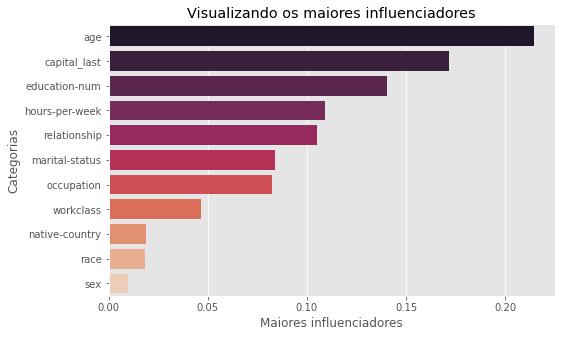

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x= feature_imp, y= feature_imp.index, palette= 'rocket')
plt.xlabel('Maiores influenciadores')
plt.ylabel('Categorias')
plt.title('Visualizando os maiores influenciadores')

In [32]:
# Selecionando os influenciadores de maior importância
features_selected = []
for feature, importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

age: 21%
capital_last: 17%
education-num: 14%
hours-per-week: 11%
relationship: 10%
marital-status: 8%
occupation: 8%
workclass: 5%
